<h1 align="center"> Rolling through Washington State </h1>

by Dru Norman

In [25]:
# import necessary libraries

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # libaray for arrays
from pandas.io.json import json_normalize # turns json into dataframes

print('Libraries imported.')

Libraries imported.


In [3]:
# The code was removed by Watson Studio for sharing.

Dataset imported.


,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [4]:
df_data_1.shape

(28889, 19)

In [5]:
# checking the population NaN's shows only 1.
print(df_data_1.isnull().sum())

city               0
city_ascii         0
state_id           0
state_name         0
county_fips        0
county_name        0
county_fips_all    0
county_name_all    0
lat                0
lng                0
population         0
density            0
source             0
military           0
incorporated       0
timezone           0
ranking            0
zips               1
id                 0
dtype: int64


In [6]:
# let's now drop all rows with any NaNs, since the other key columns aren't missing any.
df_data_1.dropna(inplace=True)

In [7]:
# with more population nulls, we can make it more readable by converting to int64 to remove the .0
df_data_1.population = df_data_1.population.astype(np.int64) 

# will work with a subset of columns:
all_cities = df_data_1[['city', 'population', 'lat', 'lng','source','state_id', 'county_name']]
all_cities.head()

,city,population,lat,lng,source,state_id,county_name
0,South Creek,2500,46.9994,-122.3921,polygon,WA,Pierce
1,Roslyn,947,47.2507,-121.0989,polygon,WA,Kittitas
2,Sprague,441,47.3048,-117.9713,polygon,WA,Lincoln
3,Gig Harbor,9507,47.3352,-122.5968,polygon,WA,Pierce
4,Lake Cassidy,3591,48.0639,-122.0920,polygon,WA,Snohomish


In [8]:
def choose_cities(df, state_id='WA', population=10000):
    '''Purpose: narrow down cities based on:
    input:  df(dataframe) of city data, 
            state_id (string) = desired state_id (WA default),
            population (int) = minimum population of cities (50K default)
    output: new df
    '''
    df = df[df['state_id'] == state_id]
    df = df[df['population'] > population]
    df = df.reset_index(drop=True)
    return(df)

In [9]:
# use the function from above to narrow down our cities and print out results by state and show a few rows
wa_cities = choose_cities(all_cities, 'WA', 10000)
print(wa_cities.shape)
print(wa_cities.groupby('state_id').count())
wa_cities.sort_values(['population'], ascending=False).reset_index(drop=True).head()

(122, 7)
          city  population  lat  lng  source  county_name
state_id                                                 
WA         122         122  122  122     122          122


,city,population,lat,lng,source,state_id,county_name
0,Seattle,3643765,47.6211,-122.3244,polygon,WA,King
1,Spokane,403043,47.6671,-117.4330,polygon,WA,Spokane
2,Kennewick,232915,46.1979,-119.1732,polygon,WA,Benton
3,Bremerton,216480,47.5436,-122.7121,polygon,WA,Kitsap
4,Tacoma,213418,47.2431,-122.4531,polygon,WA,Pierce


In [10]:
wa_cities

,city,population,lat,lng,source,state_id,county_name
0,Parkland,37019,47.1417,-122.4376,polygon,WA,Pierce
1,Poulsbo,10670,47.7417,-122.6408,polygon,WA,Kitsap
2,Anacortes,17955,48.4878,-122.6292,polygon,WA,Skagit
3,Centralia,41643,46.7225,-122.9695,polygon,WA,Lewis
4,South Hill,56379,47.1203,-122.2848,polygon,WA,Pierce
5,Fife,10154,47.2328,-122.3518,polygon,WA,Pierce
6,Camano,15989,48.1865,-122.4708,polygon,WA,Island
7,Toppenish,14441,46.3807,-120.3125,polygon,WA,Yakima
8,Yakima,133233,46.5923,-120.5496,polygon,WA,Yakima
9,Edmonds,42209,47.8114,-122.3533,polygon,WA,Snohomish


<h2> Process Dojo data</h2>

In [11]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: Hidden
CLIENT_SECRET: Hidden


In [12]:
def lookup_dojo(df, radius=RADIUS):
    '''purpose: lookup the number of dojo in a given city
    input:  dataframe of city names and lat/lng to base the lookup on
            radius in which to search (default set above)
    output: 1. dataframe 'city_dojo_roster:
    output: 2. dataframe 'city_dojo':  adds number_of_dojos column to inputted df of city, lat/lng,etc
    '''
    counter = 1 # only used to organize printed output
    per_city_dojo_count = []
    city_dojo_roster = pd.DataFrame(columns = ['city','dojo'])
    for city, clat, clng in zip(df['city'], df['lat'], df['lng']):
        # lookup by lat lng
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, clat, clng, VERSION, RADIUS, LIMIT, categoryId)
        
        # make the get call to foursquare
        results = requests.get(url).json()

        # assign relevant part of JSON to venues list
        venues = results['response']['venues']

        # tranform venues into a dataframe in case we want to use it later.
        dojo_list = json_normalize(venues)
        
        try:
            for name in dojo_list.loc[:,'name']:
                city_dojo_roster = city_dojo_roster.append({'city':city, 'dojo':name}, ignore_index=True)
        except KeyError:
            pass # handles case where 0 dojos exist for a city name
            
        # total count of dojos in this city
        per_city_dojo_count.append(dojo_list.shape[0])        
        
        print(counter, city, clat, clng, 'has count of ', dojo_list.shape[0])
        counter = counter +1
    # append the list of total counts per city onto our dataframe
    df = df.assign(number_of_dojos=np.nan).reset_index(drop=True)  # first creating the column avoids the SettingwithCopyWarning error
    df.loc[:,'number_of_dojos'] = per_city_dojo_count
    return(city_dojo_roster, df)

In [13]:
dojo_roster, city_dojos = lookup_dojo(wa_cities)

1 Parkland 47.1417 -122.4376 has count of  2
2 Poulsbo 47.7417 -122.6408 has count of  3
3 Anacortes 48.4878 -122.6292 has count of  1
4 Centralia 46.7225 -122.9695 has count of  1
5 South Hill 47.1203 -122.2848 has count of  3
6 Fife 47.2328 -122.3518 has count of  4
7 Camano 48.1865 -122.4708 has count of  0
8 Toppenish 46.3807 -120.3125 has count of  0
9 Yakima 46.5923 -120.5496 has count of  2
10 Edmonds 47.8114 -122.3533 has count of  14
11 Edgewood 47.2309 -122.2832 has count of  3
12 Battle Ground 45.7764 -122.5413 has count of  2
13 Shoreline 47.7564 -122.3426 has count of  15
14 Grandview 46.2431 -119.9084 has count of  0
15 Kelso 46.1248 -122.8909 has count of  2
16 Des Moines 47.3914 -122.3154 has count of  1
17 Seattle 47.6211 -122.3244 has count of  45
18 Everett 47.9524 -122.167 has count of  4
19 Newcastle 47.5303 -122.1633 has count of  7
20 Lakeland North 47.3374 -122.2814 has count of  13
21 Camas 45.6003 -122.4306 has count of  1
22 Tukwila 47.4748 -122.2727 has coun

In [14]:
print(dojo_roster, '\n\n---------\n\n', city_dojos.head())
# Note: the dojo_roster gives us the names of each dojo in each city.  

city_dojos

             city                                      dojo
0        Parkland         Lenderman Academy of Martial Arts
1        Parkland                Pierce County Kyokushinkai
2         Poulsbo                            Warrior Buddha
3         Poulsbo                        Cross Martial Arts
4         Poulsbo                        Cross Martial Arts
5       Anacortes                     Anacortes Soo Bahk Do
6       Centralia                                 Mma Class
7      South Hill             Champions Martial Arts Center
8      South Hill                        Puyallup Krav Maga
9      South Hill                         Kiai Martial Arts
10           Fife                  Fife Brazilian Jiu-Jitsu
11           Fife                             Team SNRG 253
12           Fife                   Edgewood Karate Academy
13           Fife                                     MABJJ
14         Yakima          Graice Barra Brazilian Jiu Jitsu
15         Yakima                   Valo

,city,population,lat,lng,source,state_id,county_name,number_of_dojos
0,Parkland,37019,47.1417,-122.4376,polygon,WA,Pierce,2
1,Poulsbo,10670,47.7417,-122.6408,polygon,WA,Kitsap,3
2,Anacortes,17955,48.4878,-122.6292,polygon,WA,Skagit,1
3,Centralia,41643,46.7225,-122.9695,polygon,WA,Lewis,1
4,South Hill,56379,47.1203,-122.2848,polygon,WA,Pierce,3
5,Fife,10154,47.2328,-122.3518,polygon,WA,Pierce,4
6,Camano,15989,48.1865,-122.4708,polygon,WA,Island,0
7,Toppenish,14441,46.3807,-120.3125,polygon,WA,Yakima,0
8,Yakima,133233,46.5923,-120.5496,polygon,WA,Yakima,2
9,Edmonds,42209,47.8114,-122.3533,polygon,WA,Snohomish,14


In [15]:
dojo_roster.head()


,city,dojo
0,Parkland,Lenderman Academy of Martial Arts
1,Parkland,Pierce County Kyokushinkai
2,Poulsbo,Warrior Buddha
3,Poulsbo,Cross Martial Arts
4,Poulsbo,Cross Martial Arts


In [15]:
def clean_city_dojos(df):
    '''purpose: run a series of cleanups and calculations on the city_dojos dataframe
    input: dataframe city_dojos that comes from function lookup_dojos.  
    output: cleaned city_dojos, with added per capita calculations
    '''
    # Drop cities with 0 dojos
    df = df[(df['number_of_dojos']!=0)].reset_index(drop=True)
    
    # remove apostrophe characters from city names (caused label mapping problem)
    df['city'] = df['city'].replace("'", "", regex=True)
    df.columns = df.columns.str.strip()  #removes padding from city column name

    # adds a per population count of brewery column, and sort:
    df.loc[:,'dojos_per_capita'] = (df['number_of_dojos'] / df['population'])
    df.loc[:,'dojos_per_100k'] = (df['number_of_dojos']*100000 / df['population'])
    df.loc[:,'people_per_dojo'] = (df['population'] / df['number_of_dojos']).astype('int64')
    df = df.sort_values(['number_of_dojos'], ascending=False).reset_index(drop=True)
    
    return(df)

In [16]:
l = (len(city_dojos.columns))
city_dojos = clean_city_dojos(city_dojos)
print('After cleaning and calculating, city_dojos went from {} to {} columns. (should gain 3)\n'.format(l, len(city_dojos.columns)))

After cleaning and calculating, city_dojos went from 8 to 11 columns. (should gain 3)



<h2> Look up dojos in specific county</h2>

In [17]:
# If interested, you could check out your county's representation with this quick search
city_dojos[city_dojos.loc[:,'county_name'] == 'King']

,city,population,lat,lng,source,state_id,county_name,number_of_dojos,dojos_per_capita,dojos_per_100k,people_per_dojo
0,Seattle,3643765,47.6211,-122.3244,polygon,WA,King,45,0.000012,1.234986,80972
1,Bellevue,144444,47.5953,-122.1550,polygon,WA,King,22,0.000152,15.230816,6565
2,Redmond,64291,47.6762,-122.1169,polygon,WA,King,21,0.000327,32.663981,3061
4,Kirkland,88630,47.6997,-122.2041,polygon,WA,King,19,0.000214,21.437437,4664
6,Lake Forest Park,13392,47.7597,-122.2878,polygon,WA,King,15,0.001120,112.007168,892
7,Shoreline,56189,47.7564,-122.3426,polygon,WA,King,15,0.000267,26.695617,3745
11,Mercer Island,25261,47.5625,-122.2265,polygon,WA,King,13,0.000515,51.462729,1943
13,Renton,101379,47.4758,-122.1905,polygon,WA,King,13,0.000128,12.823169,7798
14,Lakeland North,12487,47.3374,-122.2814,polygon,WA,King,13,0.001041,104.108273,960
15,Tukwila,20144,47.4748,-122.2727,polygon,WA,King,13,0.000645,64.535346,1549


In [18]:
# create a map that's centered to our sample by taking mean of all lat/lon values

latitude=city_dojos['lat'].mean()
longitude=city_dojos['lng'].mean()
print('The geograpical centerpoint of all results is {}, {}.'.format(latitude, longitude))

The geograpical centerpoint of all results is 47.34653725490195, -122.07412843137251.


<h2> Visualizing The Results</h2>

In [19]:
# import necessary libraries

!pip install folium
import folium # map rendering library

In [20]:



from folium.plugins import MarkerCluster

dojo_map = folium.Map(location=[latitude, longitude], zoom_start=7)
mc = MarkerCluster()

# add markers to map
for row in city_dojos.itertuples():
    mc.add_child(folium.Marker(location=[row.lat, row.lng], 
                               popup= ("City: {city}<br>"
                                       "Population: {pop}<br>"
                                       "DojoCount: {count}<br>"
                                       "People per Dojo: {ppb}"
                                      ).format(city=row.city, 
                                               pop=row.population, 
                                               count=row.number_of_dojos, 
                                               ppb=row.people_per_dojo)))
      
dojo_map.add_child(mc)
dojo_map.save('WAdojos.html')
dojo_map

<h2> Plotting The Results</h2>

Although maps give us a good visual of cities. We can click on individual cities to learn their dojo counts. However, providing a general overview will help us easily see which cities have the highest numbers of dojos, and when taking each city population estimates into account we can come up with a people per dojo stat.

In [21]:
# let's put this data into a dataframe
dojo_count = city_dojos[['city', 'number_of_dojos']]
dojo_count = dojo_count.sort_values(['number_of_dojos'], ascending=True).reset_index(drop=True)
dojo_count_top = dojo_count.sort_values(['number_of_dojos'], ascending=False).reset_index(drop=True).head(10)
dojo_count_top = dojo_count_top[::-1].head(15)
dojo_count_top

,city,number_of_dojos
9,Martha Lake,14
8,Edmonds,14
7,Shoreline,15
6,Lake Forest Park,15
5,Mountlake Terrace,17
4,Kirkland,19
3,North Lynnwood,20
2,Redmond,21
1,Bellevue,22
0,Seattle,45


<h2> Let's use a horizontal histogram to help visualize the top city's dojo count</h2>

In [22]:
# plotting the data

import matplotlib.pyplot as plt
dojo_count_top.plot(kind='barh', figsize=(15, 10))

plt.xlabel('Number of Dojos per City',fontsize=20) # add to x-label to the plot

#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Top Ten Cities Having The Most Dojos', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(dojo_count_top))], dojo_count_top.city, fontsize=20)
plt.xticks(fontsize=25)

plt.show()

<Figure size 1500x1000 with 1 Axes>

In [23]:
# repeat with full results
dojo_count = city_dojos[['city', 'number_of_dojos']]
dojo_count = dojo_count.sort_values(['number_of_dojos'], ascending=True).reset_index(drop=True)
dojo_count[::-1].head()

,city,number_of_dojos
101,Seattle,45
100,Bellevue,22
99,Redmond,21
98,North Lynnwood,20
97,Kirkland,19


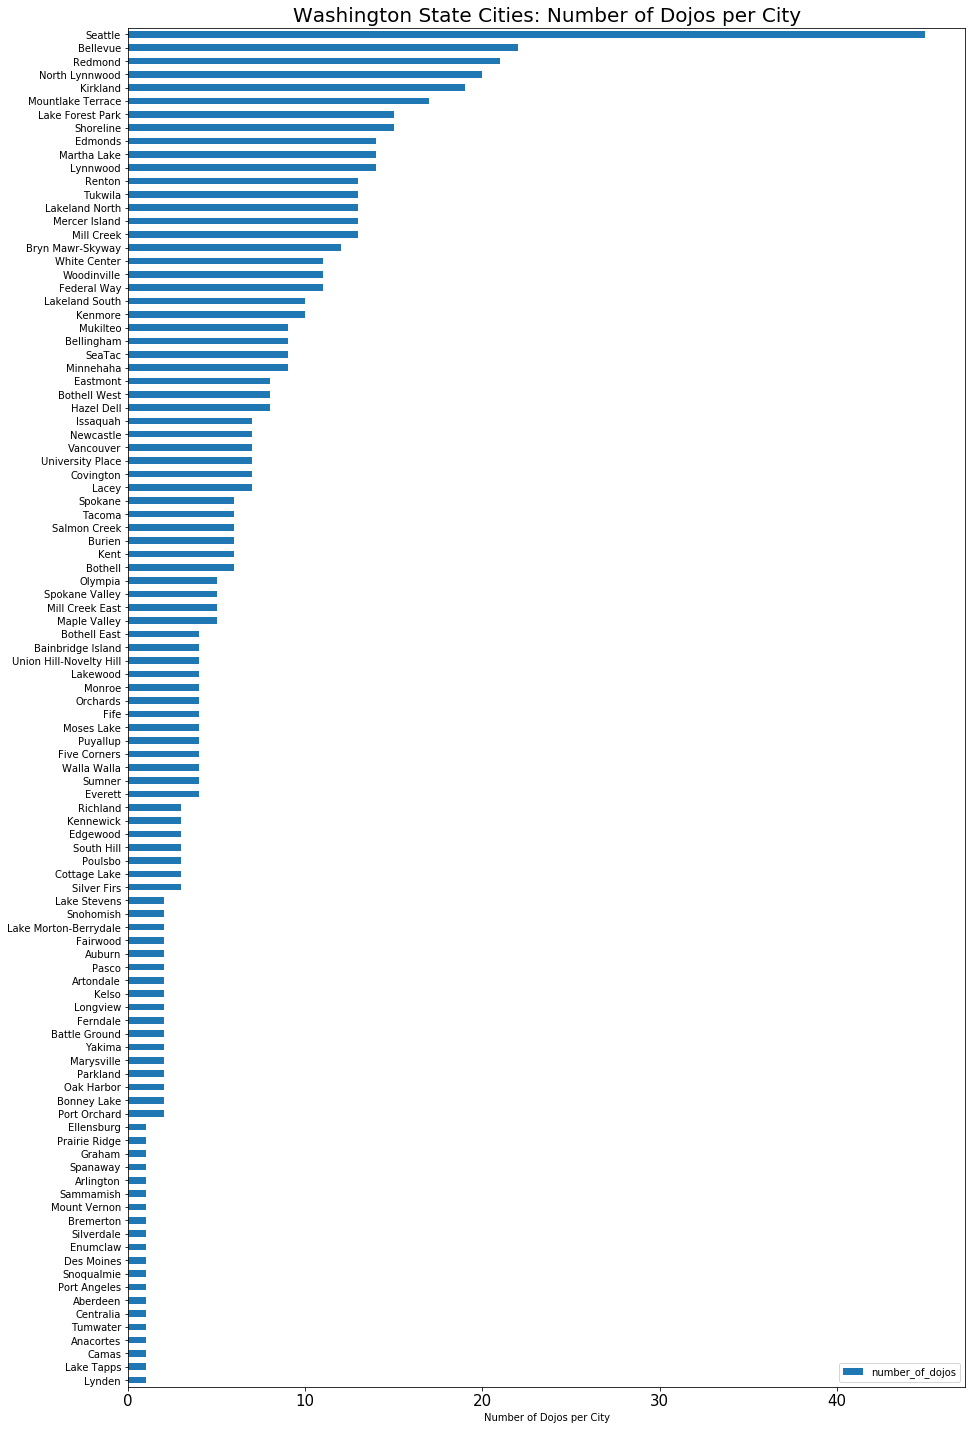

In [24]:
# plotting the data
import matplotlib.pyplot as plt
dojo_count.plot(kind='barh', figsize=(15, 25))

plt.xlabel('Number of Dojos per City',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Number of Dojos per City', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(dojo_count))], dojo_count.city, fontsize=10)
plt.xticks(fontsize=15)

plt.show()

<h2> Number of Dojos per County</h2>

In [25]:
percapita_dojos = city_dojos[['city', 'dojos_per_100k']]
percapita_dojos = percapita_dojos.sort_values(['dojos_per_100k'], ascending=True).reset_index(drop=True)
percapita_dojos_top = percapita_dojos.tail(10)

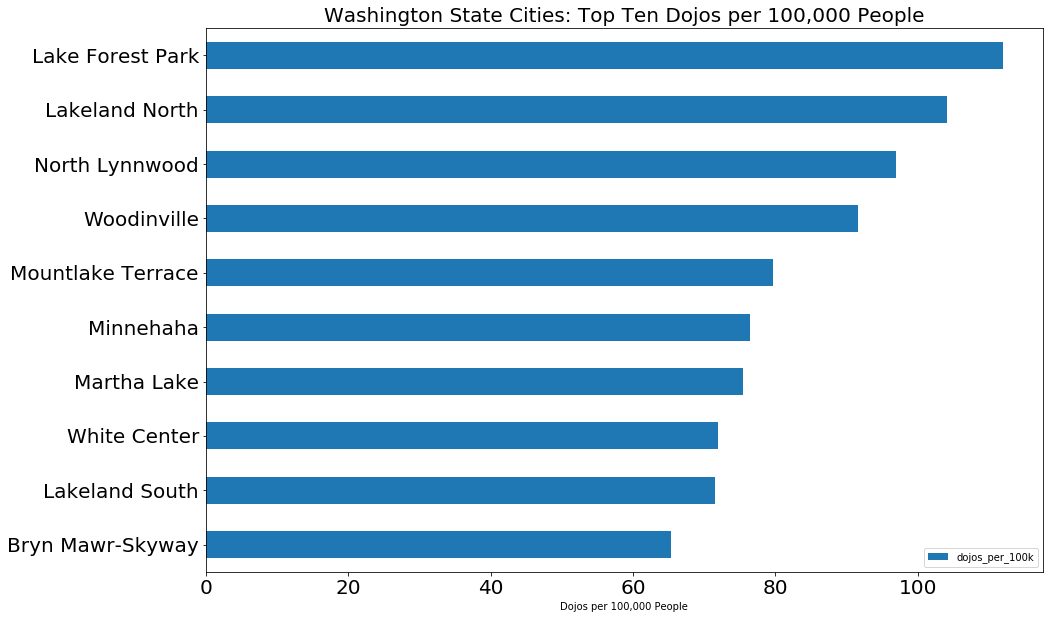

In [26]:
# plotting the top ten

import matplotlib.pyplot as plt
percapita_dojos_top.plot(kind='barh', figsize=(15, 10))

plt.xlabel('Dojos per 100,000 People',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Top Ten Dojos per 100,000 People', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(percapita_dojos_top))], percapita_dojos_top.city, fontsize=20)
plt.xticks(fontsize=20)


plt.show()

<h2> Let's take a look at the whole dataset:</h2>

In [27]:
percapita_dojos = city_dojos[['city', 'dojos_per_100k']]
percapita_dojos = percapita_dojos.sort_values(['dojos_per_100k'], ascending=True).reset_index(drop=True)

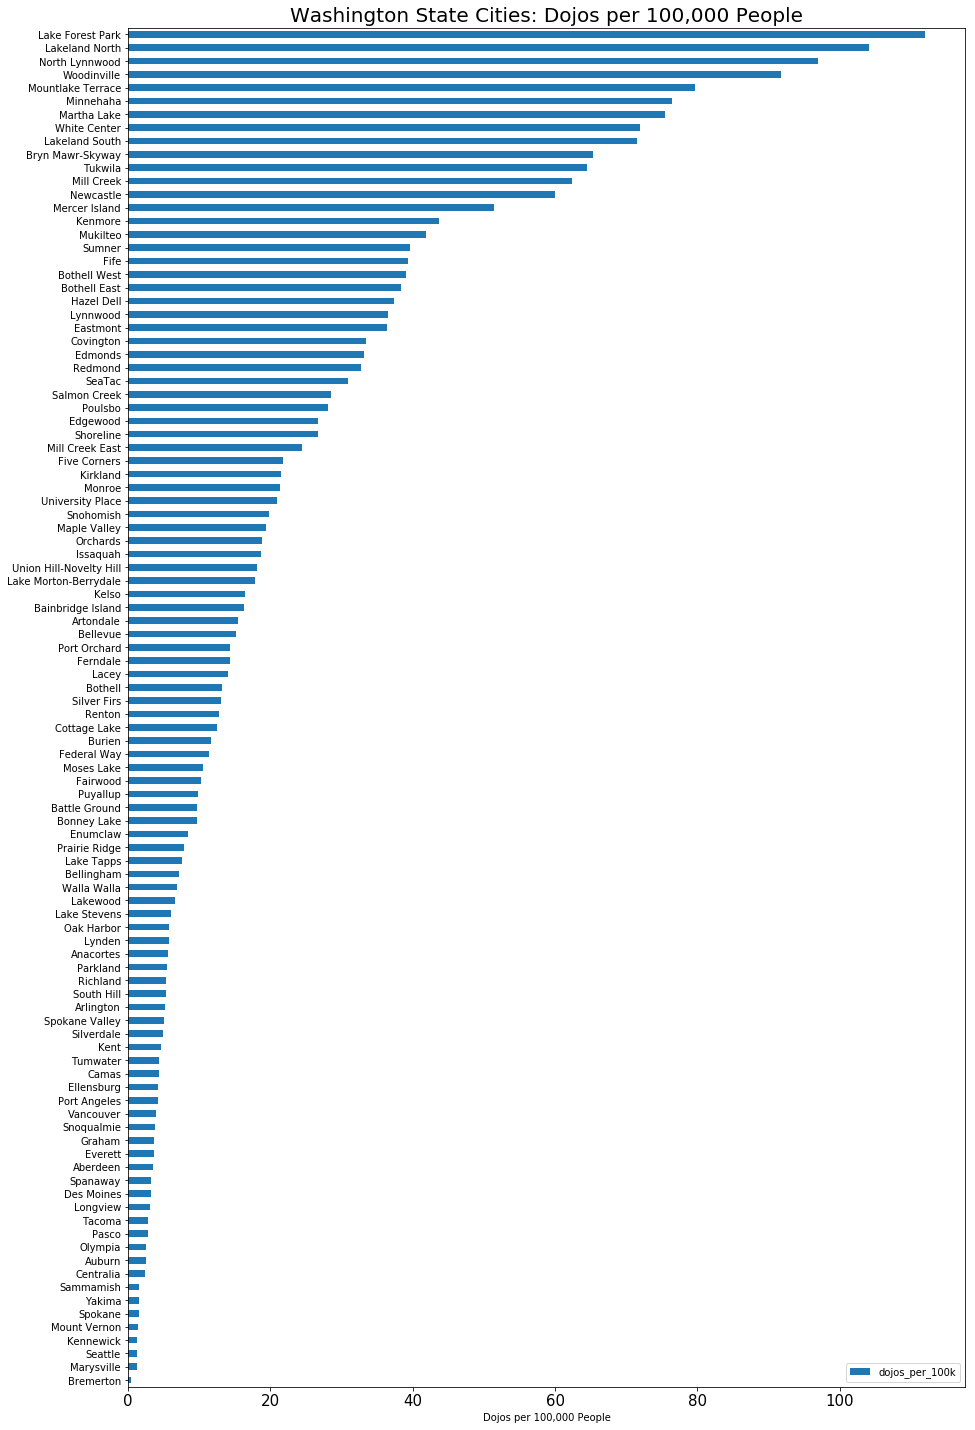

In [28]:
# plotting the whole dataset
import matplotlib.pyplot as plt
percapita_dojos.plot(kind='barh', figsize=(15, 25))

plt.xlabel('Dojos per 100,000 People',fontsize=10) # add to x-label to the plot
#plt.ylabel('City Name', fontsize=20) # add y-label to the plot
plt.title('Washington State Cities: Dojos per 100,000 People', fontsize=20) # add title to the plot
plt.yticks([s for s in range(len(percapita_dojos))], percapita_dojos.city, fontsize=10)
plt.xticks(fontsize=15)


plt.show()

<h2> Search for specific type of Martial Arts Academy</h2>

In [33]:
############# search for specific type of dojo 

dojo_roster[dojo_roster.dojo.str.contains('bjj',case=False)]


,city,dojo
13,Fife,MABJJ
25,Edmonds,Edmonds BJJ
37,Shoreline,Edmonds BJJ
62,Seattle,Summit Bjj
71,Seattle,Framework BJJ
166,Olympia,BJJ Olympia & NW High Intensity Training
307,Lake Morton-Berrydale,Phantom BJJ
415,Lake Forest Park,Edmonds BJJ
480,Tacoma,MABJJ
534,Covington,Phantom BJJ


In [42]:
mma_dojo = dojo_roster[dojo_roster.dojo.str.contains('mma',case=False)]
mma_dojo

,city,dojo
6,Centralia,Mma Class
68,Seattle,Ivan Salaverry MMA
155,Bellevue,Gracie Barra Jiu-Jitsu & MMA
161,University Place,T-TOWN MMA
175,Minnehaha,"Touch M Up MMA, LLC"
178,Minnehaha,Gladiator MMA
203,Vancouver,Gladiator MMA
216,Kent,All Fitness MMA
223,Martha Lake,Crazy Monkey MMA
250,Kenmore,Northshore MMA Academy


In [43]:
jiujitsu_dojo = dojo_roster[dojo_roster.dojo.str.contains('jiu-jitsu',case=False)]
jiujitsu_dojo

,city,dojo
10,Fife,Fife Brazilian Jiu-Jitsu
20,Edmonds,Edmonds Brazilian Jiu-Jitsu
53,Seattle,Summit Brazilian Jiu-Jitsu Club
57,Seattle,Gracie Barra Brazilian Jiu-Jitsu Academy
74,Seattle,Praxis Brazilian Jiu-Jitsu
145,Bellevue,Gracie Barra Brazilian Jiu-Jitsu
155,Bellevue,Gracie Barra Jiu-Jitsu & MMA
172,Minnehaha,Progressive Jiu-Jitsu
200,Vancouver,Progressive Jiu-Jitsu
221,Martha Lake,Edmonds Brazilian Jiu-Jitsu


In [62]:
jiujitsu_dojo.shape

(18, 2)

In [44]:
bjj_dojo = dojo_roster[dojo_roster.dojo.str.contains('bjj',case=False)]
bjj_dojo

,city,dojo
13,Fife,MABJJ
25,Edmonds,Edmonds BJJ
37,Shoreline,Edmonds BJJ
62,Seattle,Summit Bjj
71,Seattle,Framework BJJ
166,Olympia,BJJ Olympia & NW High Intensity Training
307,Lake Morton-Berrydale,Phantom BJJ
415,Lake Forest Park,Edmonds BJJ
480,Tacoma,MABJJ
534,Covington,Phantom BJJ


In [45]:
gracie_dojo = dojo_roster[dojo_roster.dojo.str.contains('gracie',case=False)]
gracie_dojo

,city,dojo
57,Seattle,Gracie Barra Brazilian Jiu-Jitsu Academy
109,Lakeland North,Gracie Barra Federal Way
145,Bellevue,Gracie Barra Brazilian Jiu-Jitsu
155,Bellevue,Gracie Barra Jiu-Jitsu & MMA
236,Lakeland South,Gracie Barra Federal Way
288,Issaquah,Gracie Barra Jiu Jitsu
341,Kirkland,Gracie Barra Kirkland
391,Federal Way,Gracie Barra Federal Way
602,Woodinville,Gracie Barra Kirkland


In [49]:
tenthth_planet_dojo = dojo_roster[dojo_roster.dojo.str.contains('10',case=False)]
tenthth_planet_dojo

,city,dojo
144,Bellevue,10th Planet Seattle
304,Spokane Valley,Hit Pit 10th Planet Jiu Jitsu


In [63]:
brazilian_dojo = dojo_roster[dojo_roster.dojo.str.contains('brazilian',case=False)]
brazilian_dojo

,city,dojo
10,Fife,Fife Brazilian Jiu-Jitsu
14,Yakima,Graice Barra Brazilian Jiu Jitsu
20,Edmonds,Edmonds Brazilian Jiu-Jitsu
53,Seattle,Summit Brazilian Jiu-Jitsu Club
57,Seattle,Gracie Barra Brazilian Jiu-Jitsu Academy
70,Seattle,Marcelo Alonso Brazilian Jiu Jitsu
74,Seattle,Praxis Brazilian Jiu-Jitsu
136,Bellevue,Elite Brazilian Jiu Jitsu
145,Bellevue,Gracie Barra Brazilian Jiu-Jitsu
215,Kent,Foster Brazilian Jiu Jitsu


In [56]:
kickboxing_dojo = dojo_roster[dojo_roster.dojo.str.contains('kickboxing',case=False)]
kickboxing_dojo

,city,dojo
40,Shoreline,"MKG Martial Arts, Kickboxing & Fitness"
82,Seattle,I Love Kickboxing
113,Lakeland North,NW Muay Thai Kickboxing
115,Lakeland North,Kickboxing Class At The Federal Way Community ...
125,Tukwila,Leading Edge Kickboxing & Martial Arts
184,Bryn Mawr-Skyway,Leading Edge Kickboxing & Martial Arts
238,Lakeland South,Kickboxing Class At The Federal Way Community ...
240,Lakeland South,NW Muay Thai Kickboxing
340,Kirkland,AMC Kickboxing And Pankration
390,Federal Way,Kickboxing Class At The Federal Way Community ...
